# Data Import, EDA, and Splitting

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
housing = pd.read_csv('./Data/hml/housing.csv')
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


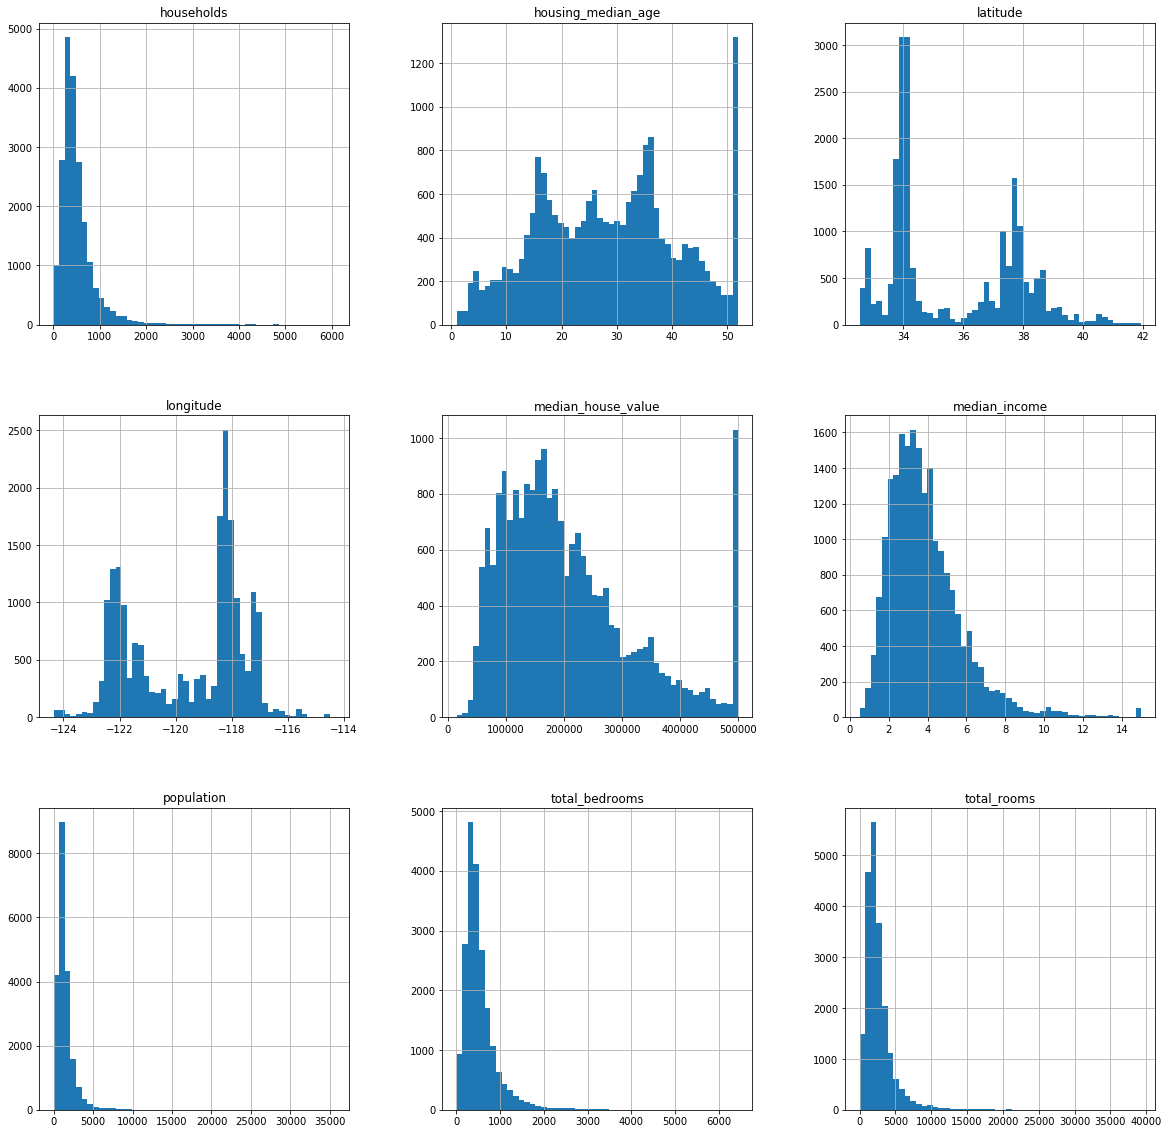

In [13]:
housing.hist(bins=50, figsize=(20,20));

## Random Sampling for the entire dataset

In [21]:
# Initial train and test set without stratification

from sklearn.model_selection import train_test_split
import numpy as np

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

## Stratified Sampling based on:

* Income Category

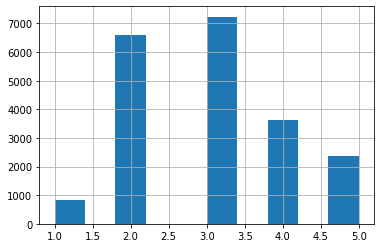

In [24]:
# After analysis, train and test set with stratification
# Stratified by income category

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1,2,3,4,5])

housing["income_cat"].hist();

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [26]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [28]:
# Drop income category feature
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Preliminary Visualization

In [30]:
# Create exploration set
housing = strat_train_set.copy()

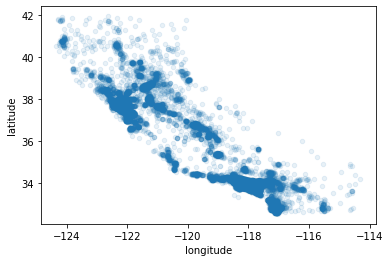

In [36]:
# Visualize data
# First pass
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1);

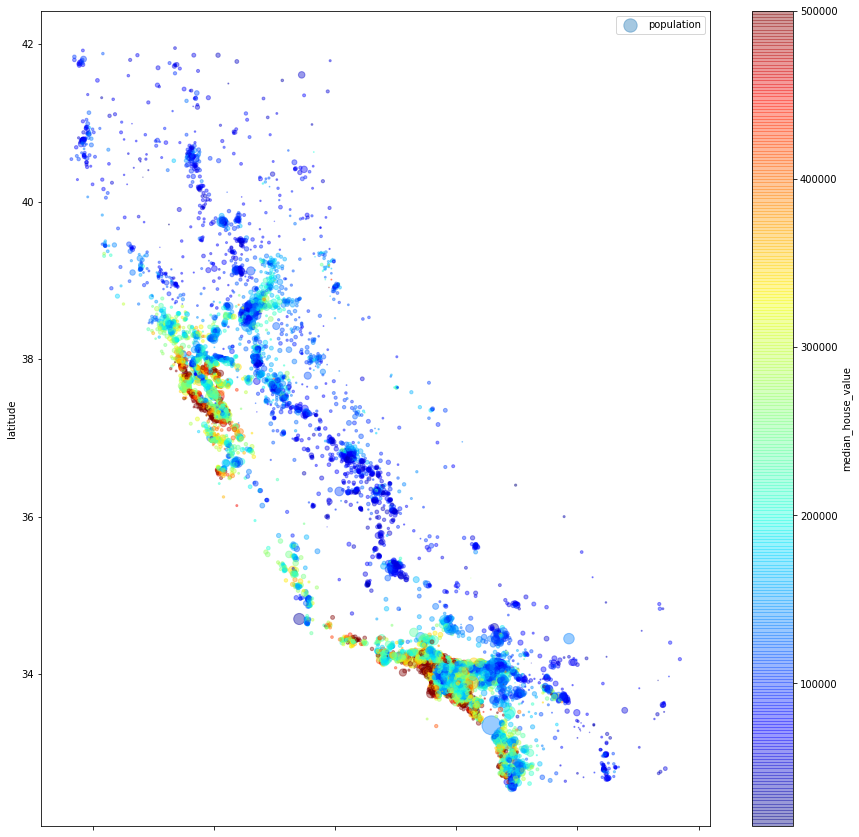

In [43]:
# Second Pass
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(15,15),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True);

## Correlation

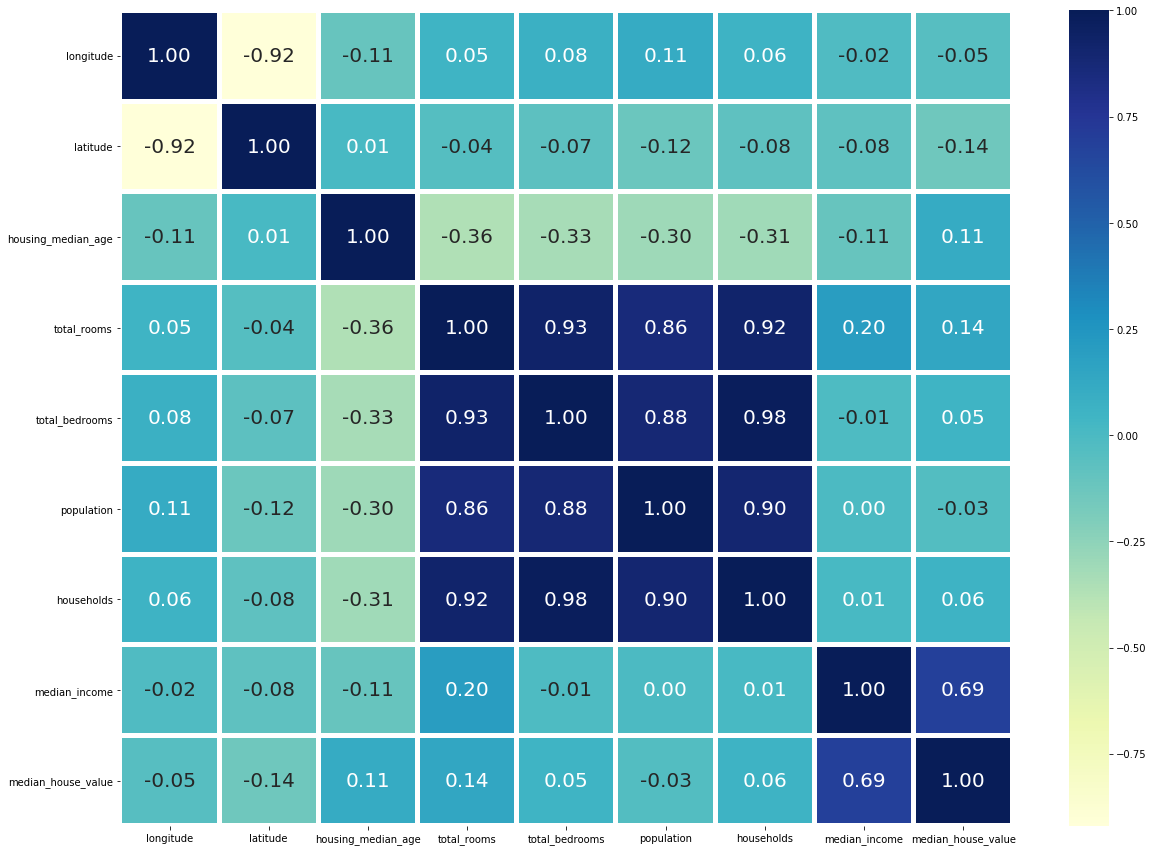

In [59]:
import seaborn as sns
corr_matrix = housing.corr().round(2)
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 annot_kws={"size": 20},
                 linewidths=4,
                 fmt=".2f",
                 cmap="YlGnBu")

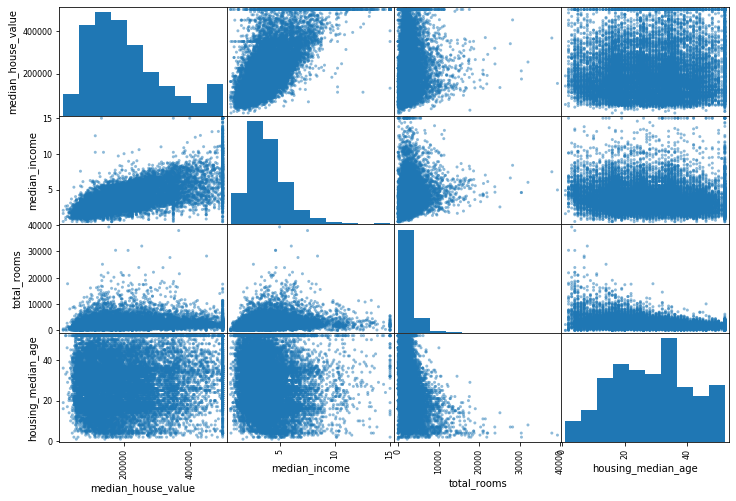

In [64]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value",
              "median_income",
              "total_rooms",
              "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12,8));

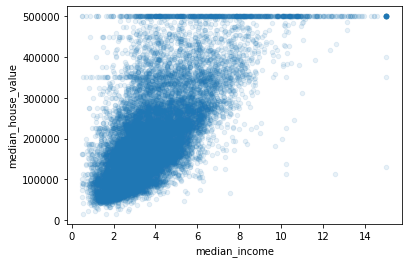

In [66]:
# Zoom in on median income
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1);

## Feature Engineering

In [67]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

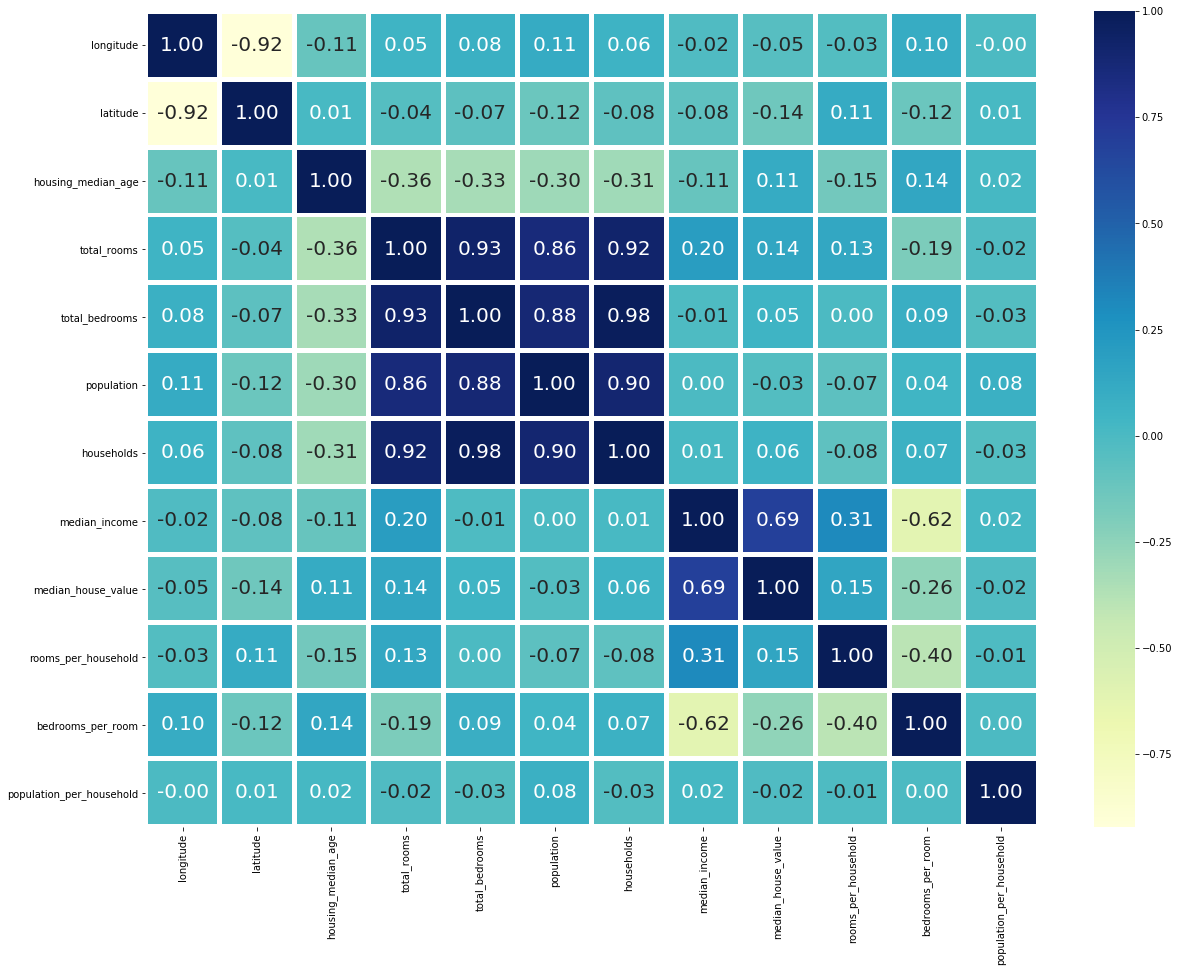

In [68]:
corr_matrix = housing.corr().round(2)
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 annot_kws={"size": 20},
                 linewidths=4,
                 fmt=".2f",
                 cmap="YlGnBu")

## Data Cleanup

In [70]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [72]:
from sklearn.impute import SimpleImputer

In [73]:
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [74]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [75]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [76]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X , columns=housing_num.columns)

In [81]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Double square brackets returns a pandas dataframe
housing_cat = housing[["ocean_proximity"]]
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [88]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [91]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

## Pipeline setup

In [92]:
# Attribute Adder Class that works with pipelines
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, population_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        

In [93]:
# Example Pipeline with custom function

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

In [94]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [96]:
pd.DataFrame(housing_num_tr)

,0,1,2,3,4,5,6,7,8,9,10
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.086499,-0.086499,0.155318
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,-0.033534,-0.033534,-0.836289
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.092405,-0.092405,0.422200
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,0.089736,0.089736,-0.196453
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.004194,-0.004194,0.269928
...,...,...,...,...,...,...,...,...,...,...,...
16507,0.722267,-0.673331,1.379547,-0.632123,-0.725361,-0.759010,-0.764049,0.554158,-0.031755,-0.031755,-0.428853
16508,1.007011,-0.823004,0.902385,-0.667196,-0.584183,-0.329664,-0.636291,-0.948815,0.084689,0.084689,0.491503
16509,1.586489,-0.724781,-1.562952,1.043901,0.822735,0.607904,0.713156,-0.316705,-0.030554,-0.030554,-0.521776
16510,0.782213,-0.851068,0.186642,-0.309919,-0.374849,-0.057178,-0.375451,0.098121,0.061509,0.061509,-0.303407


In [97]:
# Example Pipeline with ColumnTransformer using num_pipeline above
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

In [98]:
pd.DataFrame(housing_prepared)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.086499,-0.086499,0.155318,1.0,0.0,0.0,0.0,0.0
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,-0.033534,-0.033534,-0.836289,1.0,0.0,0.0,0.0,0.0
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.092405,-0.092405,0.422200,0.0,0.0,0.0,0.0,1.0
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,0.089736,0.089736,-0.196453,0.0,1.0,0.0,0.0,0.0
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.004194,-0.004194,0.269928,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.722267,-0.673331,1.379547,-0.632123,-0.725361,-0.759010,-0.764049,0.554158,-0.031755,-0.031755,-0.428853,0.0,1.0,0.0,0.0,0.0
16508,1.007011,-0.823004,0.902385,-0.667196,-0.584183,-0.329664,-0.636291,-0.948815,0.084689,0.084689,0.491503,0.0,1.0,0.0,0.0,0.0
16509,1.586489,-0.724781,-1.562952,1.043901,0.822735,0.607904,0.713156,-0.316705,-0.030554,-0.030554,-0.521776,0.0,1.0,0.0,0.0,0.0
16510,0.782213,-0.851068,0.186642,-0.309919,-0.374849,-0.057178,-0.375451,0.098121,0.061509,0.061509,-0.303407,1.0,0.0,0.0,0.0,0.0


## Model Selection

In [107]:
from sklearn.metrics import mean_squared_error

# Helper Functions
def calculate_rmse(labels, predictions):
    lin_mse = mean_squared_error(labels, predictions)
    lin_rmse = np.sqrt(lin_mse)
    return lin_rmse

In [108]:
# Linear Regression

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [210563.33661755 318260.76438827 211215.14630977  59114.79474222
 187121.77956263]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [110]:
housing_predictions = lin_reg.predict(housing_prepared)
calculate_rmse(housing_labels, housing_predictions)

68826.63585095564

In [111]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [112]:
housing_predictions = tree_reg.predict(housing_prepared)
calculate_rmse(housing_labels, housing_predictions)

0.0

In [113]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scores)

In [115]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [68025.28175096 69491.1895032  71620.55583226 70002.6806412
 72820.87090117 73460.67910276 71514.00078794 70694.54731984
 75147.54257524 71655.93365792]
Mean: 71443.3282072467
Standard deviation: 1946.796425918059


In [118]:
# Cross validate Linear Regression as well

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                              scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66899.81050358 67175.37517063 70150.13267841 74996.34376617
 67805.64981263 71294.59349397 65186.40759905 68217.48595344
 72578.14406325 67736.06602734]
Mean: 69204.00090684605
Standard deviation: 2843.429666088392


In [120]:
%time
# Might take awhile (1-2 minutes) i5-7600k 4.8ghz
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [49468.16407959 47868.46419881 50993.58258996 52489.76688387
 50186.51055853 53706.41171206 49244.85024153 48269.03779736
 53458.96570284 50622.49797431]
Mean: 50630.825173887206
Standard deviation: 1942.2599864814526


# Hyperparameter fine-tuning

In [121]:
%time
# ~30 seconds i5-7600k 4.8ghz
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [122]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [123]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63350.59848025482 {'max_features': 2, 'n_estimators': 3}
56138.48832317686 {'max_features': 2, 'n_estimators': 10}
53018.04613238723 {'max_features': 2, 'n_estimators': 30}
61051.54542347018 {'max_features': 4, 'n_estimators': 3}
53192.5343519034 {'max_features': 4, 'n_estimators': 10}
50752.0174867795 {'max_features': 4, 'n_estimators': 30}
59101.144731438006 {'max_features': 6, 'n_estimators': 3}
52493.06451722224 {'max_features': 6, 'n_estimators': 10}
50420.62161806195 {'max_features': 6, 'n_estimators': 30}
59331.82422672014 {'max_features': 8, 'n_estimators': 3}
52719.56692209338 {'max_features': 8, 'n_estimators': 10}
50563.580450099726 {'max_features': 8, 'n_estimators': 30}
63267.679871132095 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54878.185474818056 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59403.54803021485 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52965.2171161785 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [128]:
feature_importances = grid_search.best_estimator_.feature_importances_
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.33229140060903806, 'median_income'),
 (0.1627657637867464, 'INLAND'),
 (0.10465358744918732, 'bedrooms_per_room'),
 (0.07588588552229371, 'pop_per_hhold'),
 (0.06885116184406574, 'longitude'),
 (0.06557285067728873, 'latitude'),
 (0.06215384602100561, 'rooms_per_hhold'),
 (0.04322485310927403, 'housing_median_age'),
 (0.018179064356250777, 'total_rooms'),
 (0.017914183277750184, 'population'),
 (0.017255167672439505, 'households'),
 (0.01703637381498843, 'total_bedrooms'),
 (0.008158625503243403, '<1H OCEAN'),
 (0.0033797611658948176, 'NEAR OCEAN'),
 (0.002614472189700988, 'NEAR BAY'),
 (6.30030008321612e-05, 'ISLAND')]

## Predict on Test Set

In [130]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48931.92577838195

In [131]:
# Calculate confidence interval on generalization error
from scipy import stats
confidence = 0.95

squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([46931.68941253, 50853.54707047])